In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px 
%matplotlib inline

In [2]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [11]:

df = pd.read_csv("filepath" ,encoding="ISO-8859-1")

In [12]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [14]:
df = df.rename(columns={"v2": "emailText"})
df = df.rename(columns={"v1": "Label"})


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   emailText   5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [17]:
df.describe()

Label               emailText  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2

In [18]:
df.drop_duplicates(inplace=True)


In [19]:
fig = px.histogram(df, x="Label", color="Label", title="Email Authenticity Distribution")
fig

In [21]:
def no_of_words(text):
    words = text.split(" ")
    word_count = len(words)
    return word_count
df["Word Count"] = df["emailText"].apply(no_of_words)
df.head()


Label                                          emailText Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  Word Count  
0        NaN        NaN          20  
1        NaN        NaN           6  
2        NaN        NaN          28  
3        NaN        NaN          11  
4        NaN        NaN          13

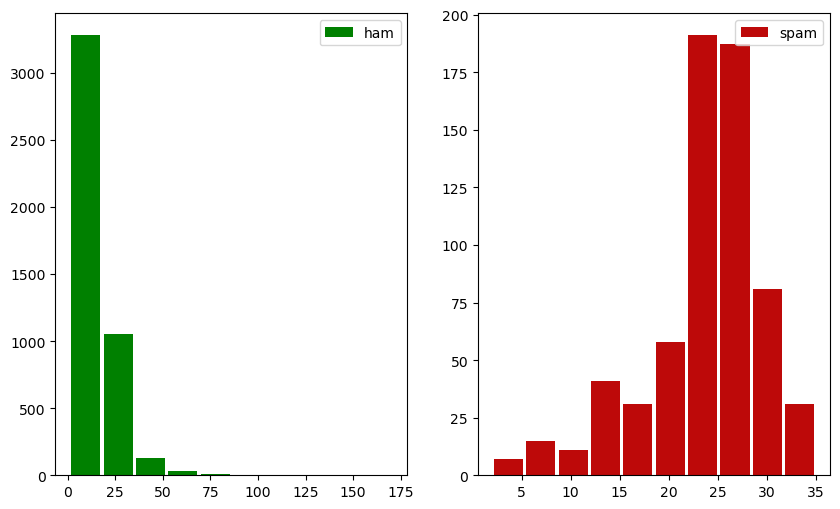

In [22]:
custom_red = "#BD0909"

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df["Label"] == "ham"]["Word Count"], label="ham", color="green", rwidth=0.9)
ax[0].legend(loc="upper right")
ax[1].hist(df[df["Label"] == "spam"]["Word Count"], label="spam", color=custom_red, rwidth=0.9)
ax[1].legend(loc="upper right")

In [25]:
stop_words = set(stopwords.words("english"))

def text_processing(text):
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)
df["emailText"] = df["emailText"].apply(text_processing)


In [26]:
stemmer = PorterStemmer()

def text_stemmer(text):
    data = [stemmer.stem(word) for word in text]
    return "".join(data)
df["emailText"] = df["emailText"].apply(lambda x: text_stemmer(x))


In [27]:
df["Label"] = df["Label"].replace({"spam" : 0, "ham" : 1})


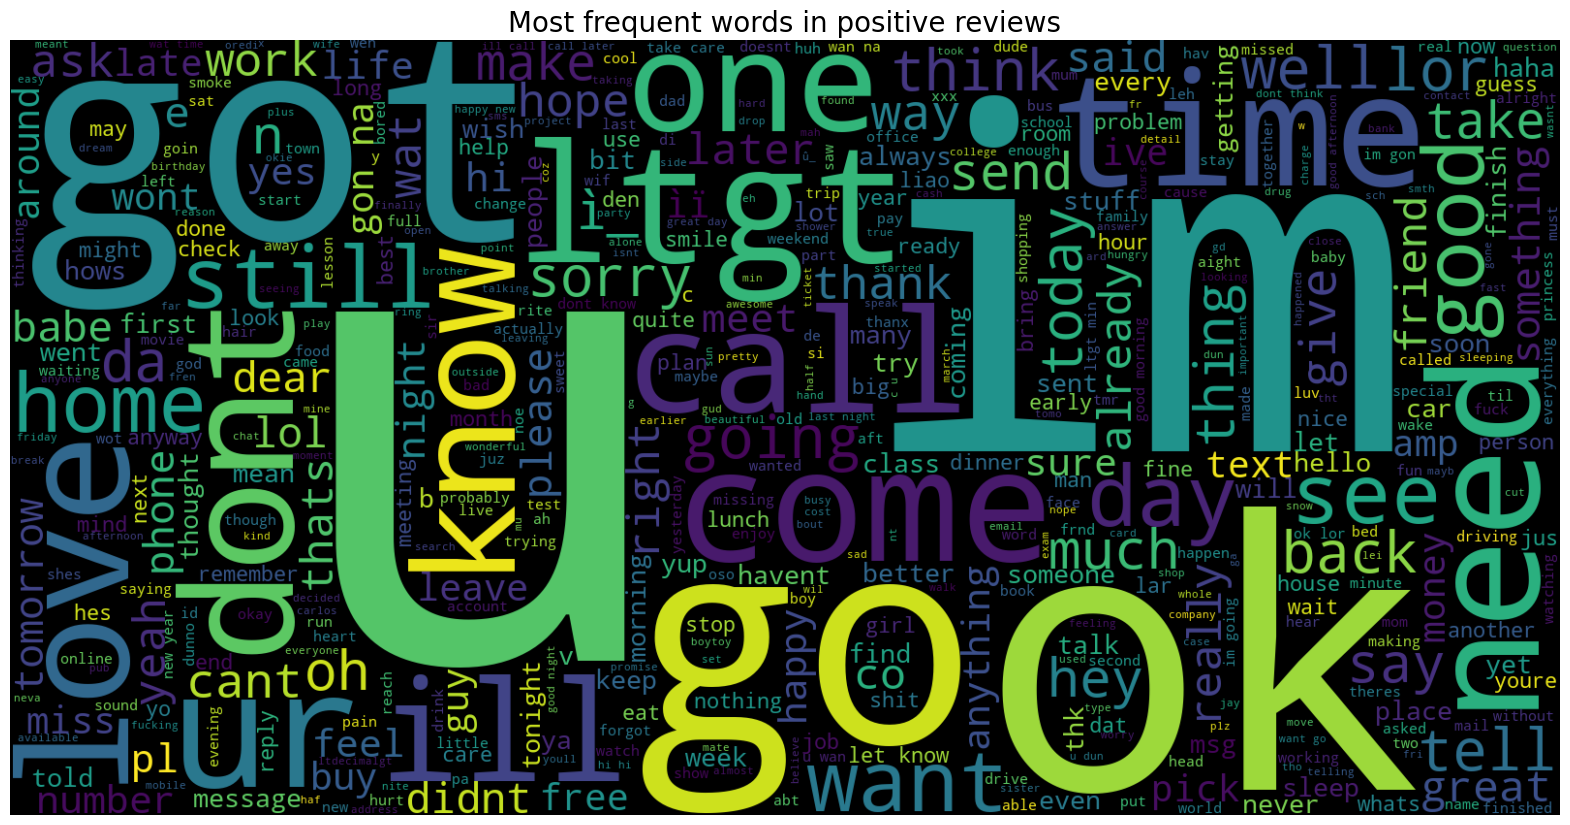

In [29]:
ham_emails = df[df["Label"] == 1]

text1 = ' '.join([word for word in ham_emails['emailText']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 20)
plt.show()

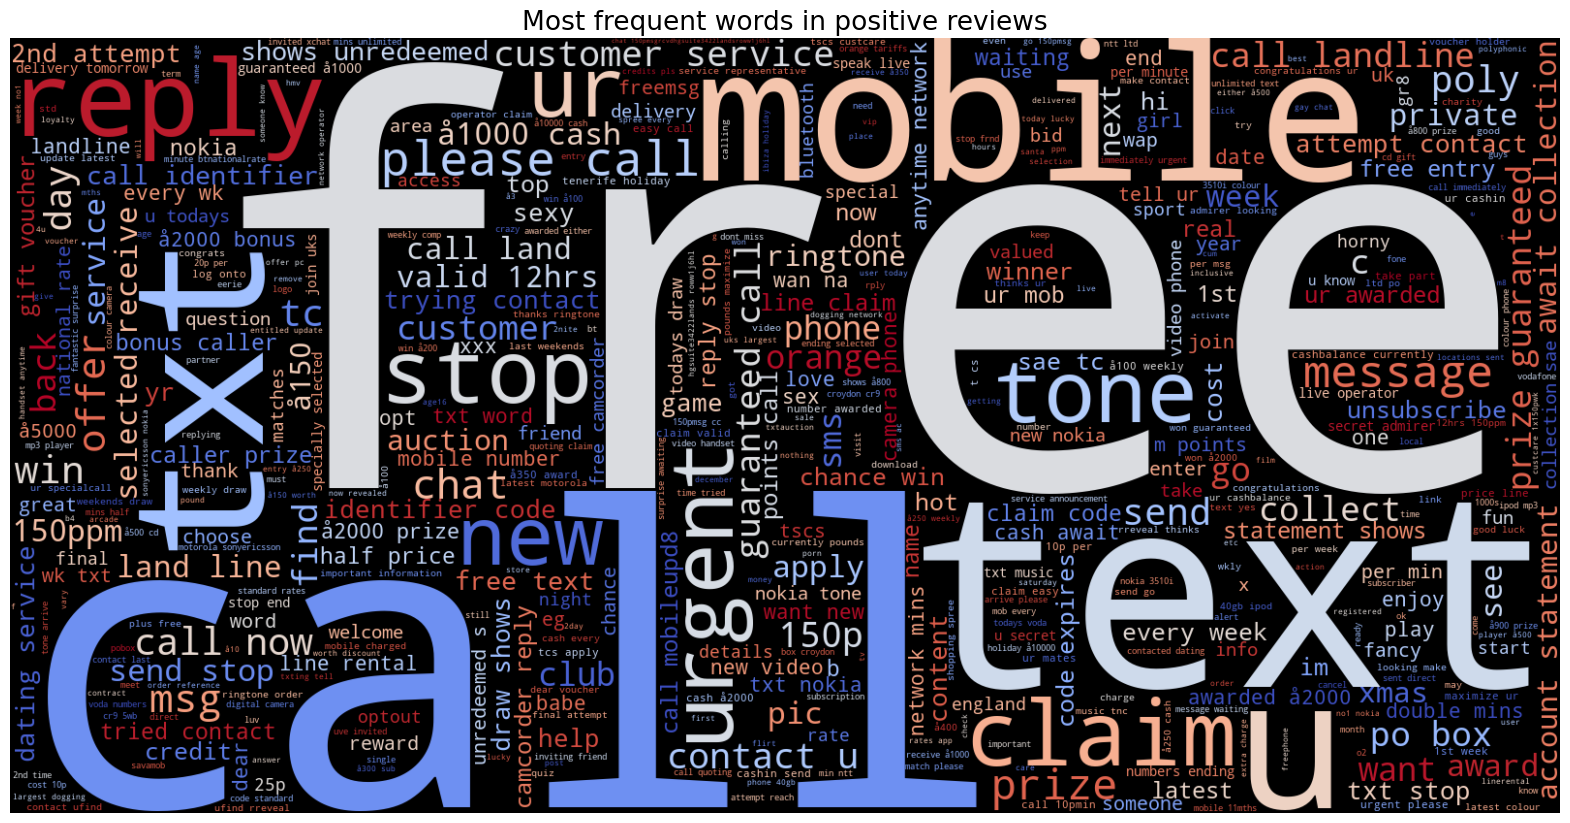

In [30]:
spam_emails = df[df["Label"] == 0]

text1 = ' '.join([word for word in spam_emails['emailText']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap="coolwarm").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [33]:
X = df["emailText"]
Y = df["Label"].values

vect = TfidfVectorizer()

X = vect.fit_transform(df["emailText"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Initialize the classifiers
lr = LogisticRegression(random_state=101)
dt = DecisionTreeClassifier(random_state=101)
nb = MultinomialNB()
rf = RandomForestClassifier(random_state=101)

# Create a dictionary to hold the models
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Naive Bayes": nb,
    "Random Forest": rf
}

# Function to train and evaluate a model
def train_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    return accuracy, f1, precision, recall

# Dictionary to hold evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    results[name] = train_eval_model(model, X_train, X_test, y_train, y_test)

# Display results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"Accuracy: {metrics[0]:.4f}, F1 Score: {metrics[1]:.4f}, Precision: {metrics[2]:.4f}, Recall: {metrics[3]:.4f}\n")


Logistic Regression:
Accuracy: 0.9275, F1 Score: 0.9171, Precision: 0.9297, Recall: 0.9275

Decision Tree:
Accuracy: 0.9468, F1 Score: 0.9448, Precision: 0.9447, Recall: 0.9468

Naive Bayes:
Accuracy: 0.9497, F1 Score: 0.9447, Precision: 0.9525, Recall: 0.9497

Random Forest:
Accuracy: 0.9565, F1 Score: 0.9531, Precision: 0.9580, Recall: 0.9565



Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

# Example with Logistic Regression
model = RandomForestClassifier(random_state=101)

# Perform 5-fold cross-validation and print accuracy scores
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean()}")


CV Accuracy Scores: [0.9787234  0.96711799 0.96808511 0.9622824  0.96805421]
Average CV Accuracy: 0.9688526217042621


Error Analysis

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = model.predict(X_test)

# Assuming `y_test` and `predictions` are available from your test set evaluation
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[ 97  44]
 [  1 892]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.69      0.81       141
           1       0.95      1.00      0.98       893

    accuracy                           0.96      1034
   macro avg       0.97      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

